No missing values.
No missing values.
Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None
Data Types:
pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object


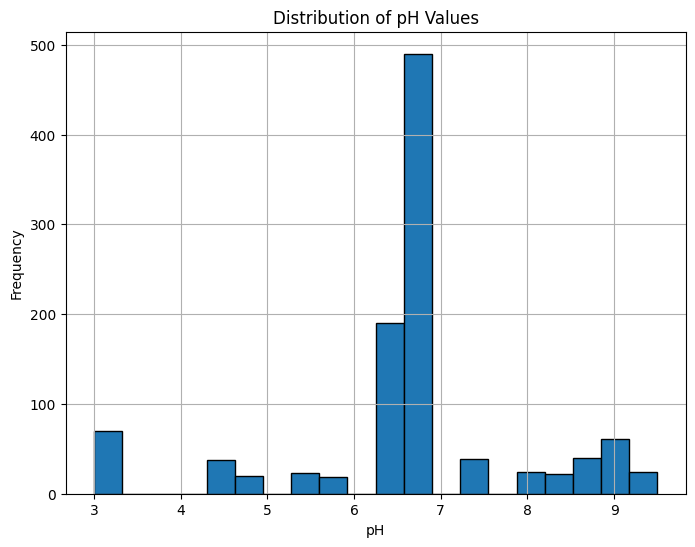

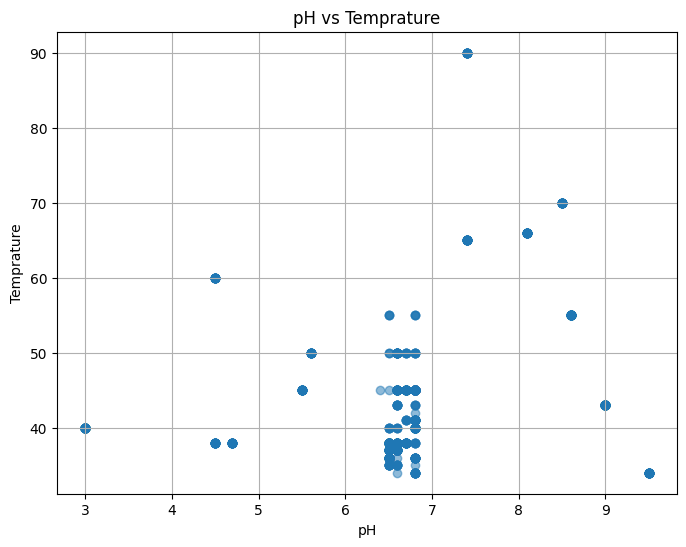

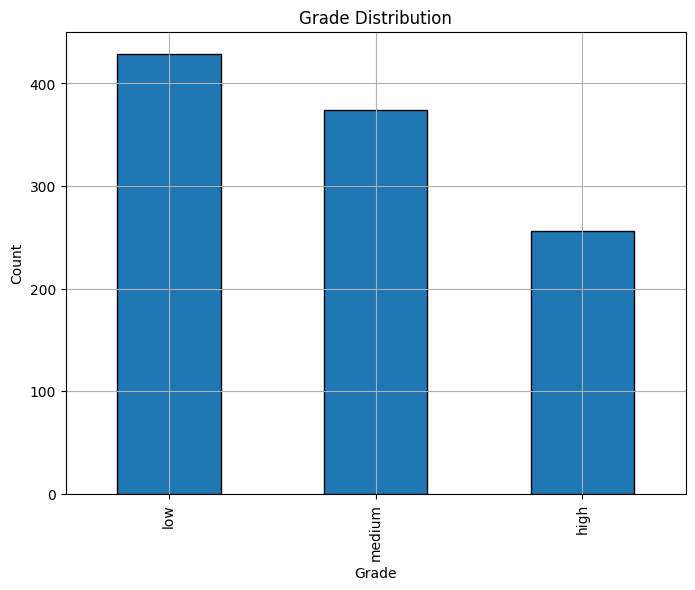

Summary statistics saved to 'summary_milk_analysis.txt' successfully.


In [1]:
#Python Project of Milk Quality Analysis - Group 10.
#Team Members are:- Soham Rathi, Mahesh Pujari, Tirtha Pawar, Diya Raibhandare

import pandas as pd #importing pandas and matplotlib libraries.
import matplotlib.pyplot as plt
import streamlit as st

def load_data(file_path): #Creating a function to load our dataset which is in the csv format.
    try:
        df = pd.read_csv(file_path) #We will read the file by passing the file path as a argument.
        return df
    except FileNotFoundError: #If the file is not present in the given filepath, it will give the following result.
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError: #If the file is empty, it will give the following result.
        print(f"Error: File '{file_path}' is empty.")
        return None
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file '{file_path}': {e}")
        return None


file_path = 'milknew.csv' #Our excel file name is given here.
df = load_data(file_path) 
if df is None: #If the dataframe is not present, then the code will not run.
    exit()


def check_missing_values(df): #Creating a function to check for missing values in our csv file.
    missing_counts = df.isnull().sum()
    if missing_counts.sum() > 0: 
        print("Missing Values:") #If the missing_counts.sum() is greater than 0 then it will print this parameter which we have passed.
        print(missing_counts)
    else:
        print("No missing values.") #Else it will print this parameter which we have passed.
check_missing_values(df) #This will check for the missing values.


def load_cleaned_data(file_path): #Defining a function to load the cleaned data whhich is saved.
    df = load_data(file_path)
    if df is not None: #If the dataframe is having some or the other data, it will print the data.
        return df
    else:
        return None
def analyze_data(df): #Defining a function for analyzing the data which is cleaned.
    print("Basic information about the dataset:")
    print(df.info())
file_path = 'cleaned_milk_data.csv' #This is the cleaned file path provided here.
cleaned_df = load_cleaned_data(file_path) #We will load the cleaned data by passing the file path as an argument.
if cleaned_df is not None: #If the cleaned file has some data, it will perform the following operations.
    check_missing_values(cleaned_df) #To check missing values inside the cleaned file.
    analyze_data(cleaned_df)
else:
    exit()
    

cleaned_file_path = 'cleaned_milk_data.csv' #Creating a function to save the cleaned data in a new csv file.



def get_data_types(df): #Creating a function to check for data types of the columns from our csv file.
    data_types = df.dtypes #This will print the data types based on the terms.
    print("Data Types:")
    print(data_types)
get_data_types(df) #This will print the data types of the columns.


def plot_histogram(df, column_name): #Creating a function to plot the columns from our csv file.
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_name], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column_name} Values')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
plot_histogram(df, 'pH') #Plotting of pH values.


def plot_scatter(df, x_column, y_column): #Creating a function to plot scatter plot of two columns from our csv file.
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()
plot_scatter(df, 'pH', 'Temprature') #This will plot a scatter plot of pH vs Temperature chart.


def plot_value_counts_bar(df, column_name): #Creating a function to plot bar plot of value counts of the columns from our csv file.
    plt.figure(figsize=(8, 6))
    value_counts = df[column_name].value_counts()
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
plot_value_counts_bar(df, 'Grade') #This will plot a bar plot of the grade counts from our csv file.


def save_summary_statistics(df, file_path): #Creating a function to save the summary of the statistics in a text file.
    summary = df.describe()
    try:
        with open(file_path, 'w') as f: #Using the w function to write in a text file.
            f.write(summary.to_string(header=True, index=True))
        print(f"Summary statistics saved to '{file_path}' successfully.")
    except IOError: #InputOutput Error as exception handling is used.
        print(f"Error: Unable to write summary statistics to '{file_path}'.")
summary_file = 'summary_milk_analysis.txt' #Given the file name to the file path.
save_summary_statistics(df, summary_file) #Passing the args to perform the operations.


In [3]:
import streamlit as st #Importing streamlit as we want to convert it into web app. It converts the data into shareable apps.
def main():
    st.title('Milk Quality Analysis')

    # Sidebar navigation
    st.sidebar.header('Navigation')
    pages = ['Home', 'Data Analysis', 'Plots', 'Summary Statistics']
    choice = st.sidebar.selectbox('Go to', pages)

    file_path = 'milknew.csv' #Loading the data by giving the file path.
    df = load_data(file_path)

    if df is None: #If dataframe is not present, it will print the following error.
        st.error("Error loading data. Please check the file path.")

    if choice == 'Home': #If we choose home option, it will print the following line.
        st.write('Welcome to Milk Quality Analysis App!')

    elif choice == 'Data Analysis': #If we choose Data Analysis, it will give the data overview.
        st.subheader('Data Overview')
        st.write(df.head())

        st.subheader('Missing Values') #This is used to check the missing values present in the dataframe.
        check_missing_values(df)

    elif choice == 'Plots': #If we choose plots, it will ask for a column to plot with the help of function created plot_histogram.
        st.subheader('Histogram')
        column_to_plot = st.selectbox('Select a column for histogram', df.columns)
        plot_histogram(df, column_to_plot) #We have to select the coloumn to be plotted from the dataframe.

    elif choice == 'Summary Statistics': #If we choose summary statistics, it will save the file's summary in a text file.
        st.subheader('Summary Statistics')
        summary_file_path = st.text_input('Enter file path to save summary statistics', 'summary_milk_analysis.txt')
        if st.button('Save Summary Statistics'):
            save_summary_statistics(df, summary_file_path) #We have to give the path where the summary file will be and it will save the statistics with the help of the dataframe.

if __name__ == '__main__':
    main()


2024-06-27 21:36:27.768 
  command:

    streamlit run C:\Users\Hemant's MACBOOK\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-27 21:36:27.769 Session state does not function when running a script without `streamlit run`
